In [28]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


# IMPORTING BASIC LIBRARIES

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import sympy

# DEFINING BACKGROUND CLASSES

In [3]:
def createBackground(nw):
        idata = np.zeros( (nw.height,nw.width,3), dtype=np.uint8 )
        # "darkgreen"
        darkgreen = (0, 128, 0)
        # "darkgray"
        darkgray = (80, 80, 80) 
        # "white" 
        dirtywhite = (250, 250, 250) 
        # "black"
        dirtyblack = (20, 20, 20) 
 
        def fill(x0, x1, y0, y1, c):
            nonlocal idata
            for x in range(x0, x1+1):
                for y in range(y0, y1+1):
                    for i in range(3):
                        idata[nw.height-1-y,x,i] = c[i]  # idata[y,x,i] = c[i]
        def green(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, darkgreen)
        def gray(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, darkgray)
        def white(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, dirtywhite)
        def black(x0, x1, y0, y1):
            fill(x0, x1, y0, y1, dirtyblack)
        def tl_red(x0, y0):
            fill(x0, x0+1, y0, y0+1, (255,0,0))
        def tl_green(x0, y0):
            fill(x0, x0+1, y0, y0+1, (0,255,0))
        def tl_yellow(x0, y0):
            fill(x0, x0+1, y0, y0+1, (255,255,0))
 
        def dline(x0, x1, y0, y1):
            nonlocal idata
            # horizontal line
            if y0==y1: 
                for x in range(x0, x1+1):
                    if (x//4)%2==0:
                        for i in range(3):
                            idata[nw.height-1-y0, x, i] = dirtywhite[i] 
            # vertical line:
            elif x0==x1: 
                for y in range(y0, y1+1):
                    if (y//4)%2==0:
                        for i in range(3):
                            idata[nw.height-1-y, x0, i] = dirtywhite[i] 
 
        def fline(x0, x1, y0, y1):
            nonlocal idata
            # horizontal line
            if y0==y1: 
                for x in range(x0, x1+1):
                    for i in range(3):
                        idata[nw.height-1-y0, x, i] = dirtywhite[i]
            # vertical line:
            elif x0==x1: 
                for y in range(y0, y1+1):
                    for i in range(3):
                        idata[nw.height-1-y, x0, i] = dirtywhite[i]
            else:
                raise ValueError("Illegal fline")
 
        green(0, nw.width-1, 0, nw.height-1)
        LW = nw.LW
        SL = nw.SL
 
        for X in nw.intersections.values():
            if not X.crossRoadIsThroughRoad(EAST) and \
                    not X.crossRoadIsThroughRoad(NORTH):
                gray(X.x-LW, X.x+LW, X.y-LW, X.y+LW) 
 
        for r in nw.getRoads(NORTH_SOUTH):
                    for s in r.segments:
                        if s.direction==SOUTH: 
                            begin = nw.height-1 if s.begin is None else s.begin.y-LW
                            end = 0 if s.end is None else s.end.y+LW
                            gray(r.x-LW, r.x+LW, end, begin)
                            center = (begin+end)//2
                            if s.giveWaySOUTH:
                                dline(r.x, r.x, end+SL, center)
                                fline(r.x, r.x, end+1, end+SL)
                                white(r.x, r.x+LW, end+1, end+2)
                            else:
                                dline(r.x, r.x, end, center)
                            if s.giveWayNORTH:
                                dline(r.x, r.x, center, begin-SL)
                                fline(r.x, r.x, begin-SL, begin)
                                white(r.x-LW, r.x, begin-1, begin) 
                            else:
                                dline(r.x, r.x, center, begin)
                        elif s.direction==NORTH: 
                            begin = 0 if s.begin is None else s.begin.y+LW
                            end = nw.height-1 if s.end is None else s.end.y-LW
                            gray(r.x-LW, r.x+LW, begin, end)
                            center = (begin+end)//2
                            if s.giveWaySOUTH:
                                dline(r.x, r.x, begin+SL, center)
                                fline(r.x, r.x, begin+1, begin+SL)
                                white(r.x, r.x+LW, begin+1, begin+2)
                            else:
                                dline(r.x, r.x, begin, center)
                            if s.giveWayNORTH:
                                dline(r.x, r.x, center, end-SL)
                                fline(r.x, r.x, end-SL, end)
                                white(r.x-LW, r.x, end-2, end-1) 
                            else:
                                dline(r.x, r.x, center, end)
        for r in nw.getRoads(EAST_WEST):
                    for s in r.segments:
                        # works
                        if s.direction==WEST: 
                            begin = nw.width-1 if s.begin is None else s.begin.x-LW
                            end = 0 if s.end is None else s.end.x+LW
                            gray(end, begin, r.y-LW, r.y+LW)
                            center = (begin+end)//2
                            if s.giveWayWEST:
                                dline(end+SL, center, r.y, r.y)
                                fline(end+1, end+SL, r.y, r.y)
                                white(end+1, end+2, r.y-LW, r.y)
                            else:
                                dline(end, center, r.y, r.y)
                            if s.giveWayEAST:
                                dline(center, begin-SL, r.y, r.y)
                                fline(begin-SL, begin, r.y, r.y)
                                white(begin-1, begin, r.y, r.y+LW) 
                            else:
                                dline(center, begin, r.y, r.y) 
                        elif s.direction==EAST:
                            begin = 0 if s.begin is None else s.begin.x+LW
                            end = nw.width-1 if s.end is None else s.end.x-LW
                            gray(begin, end, r.y-LW, r.y+LW) 
                            center = (begin+end)//2
                            if s.giveWayWEST:
                                dline(begin+SL, center, r.y, r.y)
                                fline(begin+1, begin+SL, r.y, r.y)
                                white(begin+1, begin+2, r.y-LW, r.y)
                            else:
                                dline(begin, center, r.y, r.y)
                            if s.giveWayEAST:
                                dline(center, end-SL, r.y, r.y)
                                fline(end-SL, end-1, r.y, r.y)
                                white(end-2, end-1, r.y, r.y+LW) 
                            else:
                                dline(center, end, r.y, r.y) 
                        else:
                             raise ValueError('Incompatible:', r.direction, s.direction)
 
        return idata

# IMPORTING IMAGE AND DEFINING DISPLAY MAP

In [4]:
from PIL import Image
def displayMap(nw):
        
        idata = createBackground(nw)# was formerly a method in class network
 
        res = 100
        fig = plt.figure(dpi=res)
        fig.set_figwidth(1.32*nw.width/res-0.226)
        fig.set_figheight(1.32*nw.height/res-0.226)
 
        ax = plt.gca()
        ax.axis('off')

        plt.xlim(0, nw.width-1)
        plt.ylim(0, nw.height-1)
        def flatten(l):
            return [ (r,g,b) for row in l for [r,g,b] in row ]

        img = Image.new('RGB', (nw.width, nw.height))
        img.putdata(flatten(idata.tolist()))
        img2=img.transpose(Image.FLIP_TOP_BOTTOM)
        plt.imshow(img2)

# IMPORTING FUNCANIMTAION LIBRARIE AND DEFIND ANIMATE FUNCTION

In [5]:
from matplotlib.animation import FuncAnimation
import copy
from PIL import Image
 
def animate(rec, filename, start_time=None, end_time=None):
 
    filename += "_"+VERSION+".gif"
    background = createBackground(rec.network)

    data = rec.getData()
    timerevents = data[data['event']=='timer']


    timerevents = data[data['event']=='timer']

   #CREATING LENGTH AND WIDTH PARAMETER
    VL = rec.network.VL 
    VW = rec.network.VW 
    height = rec.network.height
    width = rec.network.width
    brightWhite = (255, 255, 255)
    darkBlue = (0, 0, 180)
    darkRed = (180, 0, 0)
    darkgreen = (0, 200, 0)
    orange = (200, 120, 0)
    black = (0, 0, 0)
    darkGray = (50, 50, 50)
    def flatten(l):
        return [ (r,g,b) for row in l for [r,g,b] in row ]
    def fill(idata, x0, x1, y0, y1, c):
 
        for x in range(max(x0,0), min(x1+1,width)):
            for y in range(max(y0,0), min(y1+1,height)):
                for i in range(3):
                    idata[height-1-y,x,i] = c[i]
 
    def vehicle(idata, x, y, direction, color):
 
        VW = rec.network.VW
        VL = rec.network.VL
        x = int(round(x,0))
        y = int(round(y,0))
 
        if color=='red':
            color = darkRed
        elif color=='blue':
            color = darkBlue
        elif color=='green':
            color = darkgreen
        elif color=='black':
            color = black
        elif color=='orange':
            color = orange
        else:
            raise ValueError('undefined color:', color)

        if direction=='SOUTH':
            fill(idata, x-VW//2, x+VW//2, y, y+VL-1, color)
            fill(idata, x-VW//2, x-VW//2, y, y, brightWhite)
            fill(idata, x+VW//2, x+VW//2, y, y, brightWhite)
        elif direction=='NORTH':
            fill(idata, x-VW//2, x+VW//2, y-VL+1, y, color)
            fill(idata, x+VW//2, x+VW//2, y, y, brightWhite)
            fill(idata, x-VW//2, x-VW//2, y, y, brightWhite)

        elif direction=='EAST':
            fill(idata, x-VL+1, x, y-VW//2, y+VW//2, color)
            fill(idata, x, x, y+VW//2, y+VW//2, brightWhite)
            fill(idata, x, x, y-VW//2, y-VW//2, brightWhite)

        elif direction=='WEST':
            fill(idata, x, x+VL-1, y-VW//2, y+VW//2, color)
            fill(idata, x, x, y+VW//2, y+VW//2, brightWhite)
            fill(idata, x, x, y-VW//2, y-VW//2, brightWhite)

        else:
            raise ValueError('illegal direction')
 
    def snapshot(t):
         # get a fresh copy of the background image
        idata = copy.deepcopy(background)
        print('.', end='')

        current = timerevents[timerevents['t']==t]
        vehicles = list(current['id'])
        for id in vehicles:

            v = current[current['id']==id]
            x = v['x'].values[0]
            y = v['y'].values[0]
            d = v['dir'].values[0]
            c = v['col'].values[0]
            vehicle(idata, x, y, d, color=c)
 
            img = Image.new('RGB', (width, height))
            # note flatten is the slowest operation 
            # it takes about 90% of the execution time of
            # snapshot, around 60ms. However animation
            # framework takes about 500ms per snapshot
            img.putdata(flatten(idata.tolist()))
            img2=img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
            plt.imshow(img2)
        res = 120 # [dpi]
        fig = plt.figure(dpi=res, frameon=False)
        fig.set_figwidth(width//res)
        fig.set_figheight(height//res)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)

        plt.xlim(0, width-1)
        plt.ylim(0, height-1)

        if start_time is None:
            start_time = rec.startTime # timerevents['t'].min()

        if end_time is None:
            end_time = rec.stopTime # timerevents['t'].max()

        Δt = rec.timeStep

        times = np.arange(start_time, end_time+Δt/2, Δt)

         # interval: update frequency in milliseconds
       
        anim = FuncAnimation(fig, snapshot, repeat=True, repeat_delay=2000, 
                            frames=times, 
                            interval=100) 

         # extra args control how often the animation should be looped extra_args=['-loop','-1']
        anim.save(filename, dpi=300, writer='imagemagick')

        print('done')

# DIRECTION ATTRIBUTES AND DEFINING OF ITS CLASSES

In [6]:
NORTH = "NORTH"
SOUTH = "SOUTH"
EAST = "EAST"
WEST = "WEST"
NORTH_SOUTH = 'NORTH-SOUTH'
EAST_WEST = 'EAST-WEST'
def left(direction):
    if direction is NORTH:
        return WEST
    elif direction is SOUTH:
        return EAST
    elif direction is EAST:
        return NORTH
    elif direction is WEST:
        return SOUTH
    else:
        raise ValueError("illegal direction: "+direction)
def right(direction):
    return opposite(left(direction))
def cross(direction):
    if direction is NORTH_SOUTH:
        return EAST_WEST
    elif direction is EAST_WEST:
        return NORTH_SOUTH
    else:
        raise ValueError("illegal direction: "+direction)
def opposite(direction):
    if direction is NORTH:
        return SOUTH
    elif direction is SOUTH:
        return NORTH
    elif direction is EAST:
        return WEST
    elif direction is WEST:
        return EAST
    else:
        raise ValueError("illegal direction: "+direction)
def mainDirection(direction):
    if direction is NORTH or direction is SOUTH:
        return NORTH_SOUTH
    elif direction is EAST or direction is WEST:
        return EAST_WEST
    else:
        raise ValueError("illegal direction: "+direction)

# RELATIVE DIRECTIONS

In [7]:
LEFT = "LEFT"
RIGHT = "RIGHT"
def look(leftOrRight, direction):
    if leftOrRight is LEFT:
        return left(direction)
    elif leftOrRight is RIGHT:
        return right(direction)
    else:
        raise ValueError("unexpected: "+leftOrRight)

# CHECKING THE DIRECTION CODE

In [8]:
x = EAST
while True:
    print(x)
    x = left(x)
    if x is EAST:
        break

EAST
NORTH
WEST
SOUTH


# CREATING ROAD CLASS 

In [9]:
class Road:
    def __init__(self, network, name, shortName, direction, coord):
 
        global NORTH_SOUTH, EAST_WEST

        self.network = network
        self.name = name
        self.shortName = shortName
        self.segments = []
        if direction == NORTH_SOUTH:
            self.direction = NORTH_SOUTH
            self.x = int(round(coord*network.width, 0))
            self.y = None
            self.length = network.height
        elif direction == EAST_WEST:
            self.direction = EAST_WEST
            self.x = None
            self.y = int(round(coord*network.height, 0))
            self.length = network.width
        else:
            raise ValueError('THIS SHOWS THE ILLEGAL OR IMPROPER DIRECTION OF THE ROAD: '+direction)
        network.roads.append(self)

    def __str__(self):
        return self.name
 
    def getName(self):
        return self.name

    def getShortName(self):
        return self.shortName

    def getX(self):
        if self.x is not None:
            return self.x
        else:
            raise ValueError(' ILLEGAL OR IMPROPER CORDINATE FOR: ', self.direction)

    def getY(self):
        if self.y is not None:
            return self.y
        else:
            raise ValueError(' ILLEGAL OR IMPROPER CORDINATE FOR: ', self.direction)

    def addSegment(self, segment):
        self.segments.append(segment)

    def getRoadSegment(self, x, y):
        for s in self.segments:
            if s.contains(x, y):
                return s
        return None

    def getLength(self):
        return self.length

    def getIntersection(self, r):
        return self.network.getIntersection(self, r)

    def getCrossRoads(self):
        return self.network.getRoads(cross(self.direction))

    def getIntersections(self):
        return [ self.getIntersection(r) 
                    for r in self.getCrossRoads() ]

    def getIntersectionPoints(self, direction):
        intersections = self.getIntersections()
        if self.direction is NORTH_SOUTH:
            if direction is NORTH:
                return [ i.y for i in intersections]
            else:
                return [ self.length-i.y for i in intersections]
        else: # EAST_WEST
            if direction is EAST:
                    return [ i.x for i in intersections]
            else:
                    return [ self.length-i.x for i in intersections]

    def freeDist(self, direction, r):
        intersection = self.getIntersection(r)
        queueLength = intersection.getQueueLength(direction)
        s = intersection.stop(direction, queueLength)
        if self.direction is NORTH_SOUTH:
            y = s[1] if direction==NORTH else self.length-s[1]
            return y
        else:
            x = s[0] if direction==EAST else self.length-s[0]
        return x

    def freeDistance(self, direction):
        crossRoads = self.getCrossRoads()
        distances = [ self.freeDist(direction, r) 
                        for r in crossRoads ]
        return min(distances)

    def getVehicles(self, direction):
        acc = []
        for v in self.network.rec.vehicles:
            if v.road==self and v.direction==direction:
                acc.append(v)
        return acc

# INTERSECTION CLASS DEFINING

In [10]:
class Intersection:
    def __init__(self, network, rNS, rEW):
        self.name = rNS.name + ' x ' + rEW.name
        self.rNS = rNS
        self.rEW = rEW
        self.x = rNS.x
        self.y = rEW.y
        self.network = network
        self.NE = None
        self.NW = None
        self.SE = None
        self.SW = None
        self.queues = { NORTH: None, EAST: None, SOUTH: None, WEST: None }
        self.queues = { NORTH: None, EAST: None, SOUTH: None, WEST: None }
        self.spots = { NORTH: [], EAST: [], SOUTH: [], WEST: [] }
        self.trafficLight = None
        self.env = None
        if self.network.rec is not None:
            self.env = self.network.rec.env 
 
    def __str__(self):
        return self.name

    def centrePoint(self):
        return (self.x, self.y)

    def crossRoad(self, incomingDirection):
        if incomingDirection is NORTH or \
                incomingDirection is SOUTH:
            return self.rEW
        else:
            return self.rNS
    def crossRoadIsThroughRoad(self, incomingDirection):
        road = self.crossRoad(incomingDirection)
        for s in road.segments:
            if s.begin==self or s.end==self:
                return False
        return True
    def getQueueLength(self, incomingDirection):
        queue = self.queues[incomingDirection]
        if queue is None:
            env = self.network.rec.env
            queue = simpy.Resource(env, capacity=1)
            self.queues[incomingDirection] = queue
        return len(queue.queue)
    def request(self, incomingDirection):
        env = self.network.rec.env
        queue = self.queues[incomingDirection]
        spots = self.spots[incomingDirection]
        if queue is None:
            queue = simpy.Resource(env, capacity=1)
            self.queues[incomingDirection] = queue
        request = queue.request()
        if len(queue.queue)>=len(spots):
            spots += [ simpy.Resource(env, capacity=1) ]
            self.spots[incomingDirection] = spots 
        return request
    def release(self, incomingDirection, request):
        queue = self.queues[incomingDirection]
        queue.release(request)
    def getSpotRequest(self, incomingDirection, pos):
        env = self.network.rec.env
        spots = self.spots[incomingDirection]
        while pos>=len(spots):
            spots += [ simpy.Resource(env, capacity=1) ]
            self.spots[incomingDirection] = spots
        request = spots[pos].request()
        return request
    def releaseSpot(self, incomingDirection, pos, request):
        spots = self.spots[incomingDirection]
        spots[pos].release(request)
    def stop(self, direction, queueLength):
        LW = self.network.LW # Lane Width
        VL = self.network.VL # Vehicle Length
        LD = self.network.LD # Stop Line Distance
        SD = self.network.SD # Stop Distanc
        dist = VL+SD
        if direction is NORTH:
            return (self.x-LW/2, self.y-LW-LD-queueLength*dist)
        elif direction is SOUTH:
            return (self.x+LW/2, self.y+LW+LD+queueLength*dist)
        elif direction is EAST:
            return (self.x-LW-LD-queueLength*dist, self.y+LW/2)
        elif direction is WEST:
            return (self.x+LW+LD+queueLength*dist, self.y-LW/2)

# ROADSEGMENT CLASS DEFINING

In [11]:
class RoadSegment:
    def __init__(self, road, begin, end):
 
        if road.direction==NORTH_SOUTH:
            self.direction = SOUTH
            self.giveWayNORTH = begin is not None
            self.giveWaySOUTH = end is not None
        elif road.direction==EAST_WEST:
            self.direction = WEST
            self.giveWayEAST = begin is not None
            self.giveWayWEST = end is not None
        self.road = road
        self.begin = road.network.getIntersection(road, begin)
        self.end = road.network.getIntersection(road, end)
        self.name = road.name + "(" + self.direction + ") ["+str(begin)+","+str(end)+"]"
        road.addSegment(self)
        def __str__(self):
            return self.name

    def contains(self, x, y):
        if self.road.direction is NORTH_SOUTH:
            return min(begin.y, end.y) <= y <= max(begin.y, end.y) and \
                    self.road.x-LW <= x <= self.road.x+LW
        elif self.road.direction is EAST_WEST:
            return min(begin.x, end.x) <= x <= max(begin.x, end.x) and \
                    self.road.y-LW <= y <= self.road.y+LW
        else:
            raise ValueError('THIS IS AN ILLEGAL DIRECTION:', self.road.name)

# ROADNETWORK CLASS

In [12]:
class RoadNetwork:
    def __init__(self, name, width, height, rec=None):
        self.rec = rec
        if rec is not None:
            rec.network = self
        self.name = name
        self.width = width
        self.height = height
        self.roads = []
        self.intersections = dict()
        self.background = None
        self.LW = 8 
        self.SL = 40 
        self.VL = 10 
        self.VW = 4 
        self.LD = 3 
        self.SD = 4 
 
    def addRoad(self, name, shortName, direction, coord):
        for r in self.roads:
            if name in [r.getName(), r.getShortName()]:
                raise ValueError("Road name re-used: ", name)
            if shortName in [r.getName(), r.getShortName()]:
                raise ValueError("Road name re-used: ", shortName)
        r = Road(self, name, shortName, direction, coord)
        return r
    def getRoads(self, direction):
        return [ r for r in self.roads if r.direction is direction ]
    def getRoad(self, name):
        for r in self.roads:
            if r.name == name or r.shortName == name:
                return r
        return None
    def getIntersection(self, r1, r2):
        if r1 is None or r2 is None:
            return None
        if type(r1) is str:
            r1 = self.getRoad(r1)
        if type(r2) is str:
            r2 = self.getRoad(r2)
        if r1.network is not self or r2.network is not self:
            raise ValueError('intersection roads from different networks')
        rNS, rEW = (r1, r2) if r1.direction is NORTH_SOUTH else (r2, r1)
        if rNS.direction is not NORTH_SOUTH or \
                rEW.direction is not EAST_WEST:
            raise ValueError('problem with intersection:', rNS.name, rEW.name)
        name = rNS.name + ' x ' + rEW.name 
        if name not in self.intersections:
            intersection = Intersection(self, rNS, rEW)
            self.intersections[name] = intersection
        return self.intersections[name]

    def getIntersectionByName(self, name):
        if name in self.intersections:
            return self.intersections[name]
        else:
            return None

# EASYCROSSING1 CREATING AND DISPLAYING

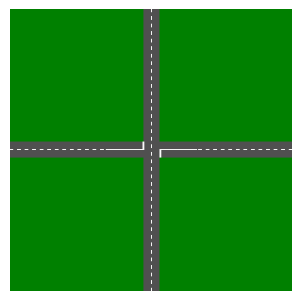

In [13]:
def easyCrossing1(): # works
    nw = RoadNetwork("Simple Crossing", 300, 300)
 
    MSt = nw.addRoad("Main St", "MSt", NORTH_SOUTH, 0.5)
    RoadSegment(MSt, None, None)
 
    CRd = nw.addRoad("Cross Rd", "CRd", EAST_WEST, 0.5)
    RoadSegment(CRd, None, MSt)
    RoadSegment(CRd, MSt, None)
    
    return nw
 
displayMap(easyCrossing1())

# EASYCROSSING2 CREATING AND DISPLAYING

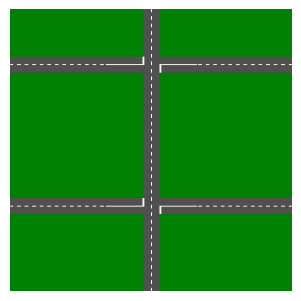

In [14]:
def easyCrossing2():
    nw = RoadNetwork("Simple Crossing", 300, 300)

    MSt = nw.addRoad("Main St", "MSt", NORTH_SOUTH, 0.5)
    RoadSegment(MSt, None, None)

    NRd = nw.addRoad("North Rd", "NRd", EAST_WEST, 0.8)
    RoadSegment(NRd, None, MSt)
    RoadSegment(NRd, MSt, None)

    SRd = nw.addRoad("South Rd", "SRd", EAST_WEST, 0.3)
    RoadSegment(SRd, None, MSt)
    RoadSegment(SRd, MSt, None)

    return nw
 
displayMap(easyCrossing2())

# EASYCROSSING4 CREATING AND DISPLAYING

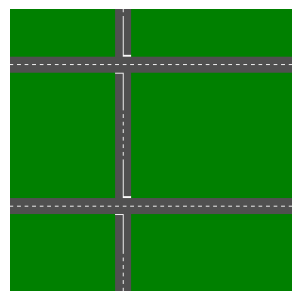

In [16]:
def easyCrossing4(): # works
    nw = RoadNetwork("Simple Crossing", 300, 300)
    NRd = nw.addRoad("North Rd", "NRd", EAST_WEST, 0.8)
    RoadSegment(NRd, None, None)

    SRd = nw.addRoad("South Rd", "SRd", EAST_WEST, 0.3)
    RoadSegment(SRd, None, None)

    MSt = nw.addRoad("Main St", "MSt", NORTH_SOUTH, 0.4)
    RoadSegment(MSt, None, NRd)
    RoadSegment(MSt, NRd, SRd)
    RoadSegment(MSt, SRd, None)

    return nw
 
displayMap(easyCrossing4())

# EASYCROSSING5 CREATING AND DISPLAYING

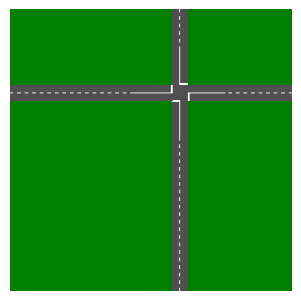

In [17]:
def easyCrossing5(): # works
    nw = RoadNetwork("Simple Crossing", 300, 300)
    MSt = nw.addRoad("Main St", "MSt", NORTH_SOUTH, 0.6)
    CRd = nw.addRoad("Cross Rd", "CRd", EAST_WEST, 0.7)
    RoadSegment(CRd, None, MSt)
    RoadSegment(CRd, MSt, None)
    RoadSegment(MSt, None, CRd)
    RoadSegment(MSt, CRd, None)
    return nw
 
displayMap(easyCrossing5())

# town_one

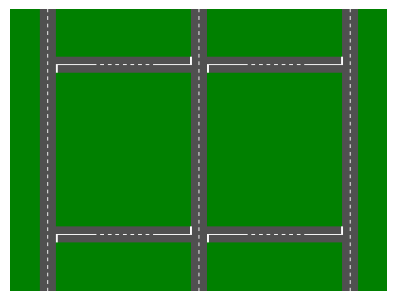

In [29]:
def town_one():
    nw = RoadNetwork("Example 1", 400, 300)
    WSt = nw.addRoad("West St", "WSt", NORTH_SOUTH, 0.1)
    RoadSegment(WSt, None, None)
    MSt = nw.addRoad("Main St", "MSt", NORTH_SOUTH, 0.5)
    RoadSegment(MSt, None, None)
    ESt = nw.addRoad("East St", "ESt", NORTH_SOUTH, 0.9)
    RoadSegment(ESt, None, None)

    NRd = nw.addRoad("North Rd", "NRd", EAST_WEST, 0.8)
    RoadSegment(NRd, ESt, MSt)
    RoadSegment(NRd, MSt, WSt)
    SRd = nw.addRoad("South Rd", "SRd", EAST_WEST, 0.2)
    RoadSegment(SRd, ESt, MSt)
    RoadSegment(SRd, MSt, WSt)
    return nw
 
displayMap(town_one())

# town_two

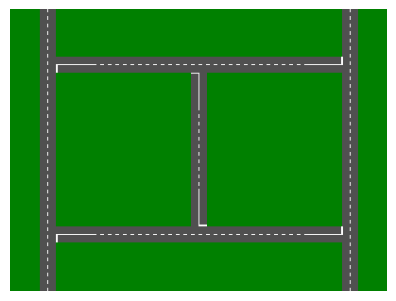

In [30]:
def town_two():
    nw = RoadNetwork("Example 1", 400, 300)
    WSt = nw.addRoad("West St", "WSt", NORTH_SOUTH, 0.1)
    RoadSegment(WSt, None, None)
    ESt = nw.addRoad("East St", "ESt", NORTH_SOUTH, 0.9)
    RoadSegment(ESt, None, None)
    NRd = nw.addRoad("North Rd", "NRd", EAST_WEST, 0.8)
    RoadSegment(NRd, ESt, WSt)
    SRd = nw.addRoad("South Rd", "SRd", EAST_WEST, 0.2)
    RoadSegment(SRd, ESt, WSt)
    MSt = nw.addRoad("Main St", "MSt", NORTH_SOUTH, 0.5)
    RoadSegment(MSt, NRd, SRd)
    return nw
 
displayMap(town_two())

In [19]:
A_BRAKE = -8.0
A_COAST = -1.8
A_MAX = 4.6 

# VEHIVLE CLASS 

In [20]:
class Vehicle:
 
    def __init__(self, rec, road, direction,
                t0=0, v=0, a=0, 
                vmax=None, color='red',
                plan=None):

    
        self.id = rec.register(self)

        self.a_brake = A_BRAKE
        self.a_coast = A_COAST
        self.a_max = A_MAX
        self.length = rec.network.VL 
        self.vmax = vmax
        self.color = color
        self.plan = plan

        self.env = rec.env
        self.rec = rec
        self.t0 = t0
        self.road = road
    
        if direction==SOUTH: 
            self.direction = SOUTH
            self.cos휑, self.sin휑 = 0, -1
            self.x0 = road.x+rec.network.LW//2
            self.y0 = rec.network.height-1
        elif direction==NORTH:
            self.direction = NORTH
            self.cos휑, self.sin휑 = 0, +1
            self.x0 = road.x-rec.network.LW//2
            self.y0 = 0 
        elif direction==EAST:
            self.direction = EAST
            self.cos휑, self.sin휑 = +1, 0
            self.x0 = 0
            self.y0 = road.y+rec.network.LW//2
        elif direction==WEST:
            self.direction = WEST
            self.cos휑, self.sin휑 = -1, 0
            self.x0 = rec.network.width-1
            self.x0 = rec.network.width-1
            self.y0 = road.y-rec.network.LW//2
        else:
            raise ValueError("illegal direction", direction)
        self.startPoint = (self.x0, self.y0)    
        self.dx0, self.dy0 = v*self.cos휑, v*self.sin휑
        self.ddx0, self.ddy0 = a*self.cos휑, a*self.sin휑

        self.traceAdjustVelocity = False
        self.traceCruising = False

        self.running = False
        self.env.process(self.process())

    def __str__(self):
        return f"v{self.id:d}"

    def trace(self, message):
        print(f"t={self.t0:5,.1f}s "
            f"x={self.x0:5,.1f}m y={self.y0:5,.1f}m "
            f"v={self.v():4.1f}m/s v{self.id:02d} "
            f"on {self.road.shortName:s}[{self.direction[0]:s}]", 
            message)

    def Δs(self, P=None):
        if P is None:
            P = self.startPoint
        return math.sqrt((self.x0-P[0])**2+(self.y0-P[1])**2)
    def setV(self, v):
        self.dx0, self.dy0 = v*self.cos휑, v*self.sin휑

    def v(self):
        return math.sqrt(self.dx0**2+self.dy0**2)

    def Δv(self, other):
        return math.sqrt((self.dx0-other.dx0)**2+(self.dy0-other.dy0)**2)


    def setA(self, a):
        self.ddx0, self.ddy0 = a*self.cos휑, a*self.sin휑

    def a(self):
        return self.ddx0/self.cos휑 if self.cos휑!=0 else self.ddy0/self.sin휑

    def dist(self, v):
        if v is None:
            return math.inf
        else:
            return self.Δs((v.x0, v.y0)) - v.length

    def update(self):
        t = self.env.now
        if t < self.t0: 
            return False
        if t > self.t0:
            Δt = t - self.t0
            Δdx = self.ddx0*Δt
            Δdy = self.ddy0*Δt
            Δx = self.dx0*Δt + self.ddx0*Δt*Δt/2
            Δy = self.dy0*Δt + self.ddy0*Δt*Δt/2
            self.t0 = t
            self.x0, self.y0 = self.x0+Δx, self.y0+Δy
            self.dx0, self.dy0 = self.dx0+Δdx, self.dy0+Δdy
            if not self.running:
                return self.running

            if self.x0<0 or self.x0>self.rec.network.width or \
                self.y0<0 or self.y0>self.rec.network.height:
                self.running = False
            return True
 
    def process(self):

        if self.t0>self.env.now:
            yield self.env.timeout(self.t0-self.env.now)
        self.t0 = self.env.now
        self.running = True
        self.rec.startRecording(self)
        while self.update():
  
            if self.plan is not None and len(self.plan)>0:
                command = self.plan[0]
                split = command.find('@')
                if split<0:
                    action = command
                    position = ""
                elif 0 < split < len(command)-1:
                    action = command[:split]
                    position = command[split+1:] 
                split1 = action.find('(')
                split2 = action.find(')')
                if 0 < split1 < split2:
                    params = action[split1+1:split2].split(',')
                    pars = [ float(p) for p in params ]
                    action = action[:split1]
                else:
                    pars = []
                if action == "Acc":
                    self.setA(pars[0])
                    self.update()
                    yield self.env.timeout(pars[1])
                    self.plan = self.plan[1:]
                    continue
 
                elif action == "Stop":
                    if len(pars)>0:
                        Δs = pars[0]
                        yield from self.stop(Δs)
                        self.plan = self.plan[1:]
                        continue
                    else:
                        intersection = self.road.getIntersection(position)
                        stopPoint = intersection.stop(self.direction, 0)
                        Δs = self.Δs(stopPoint)
                        yield from self.stop(Δs)
                        self.plan = self.plan[1:]
                        continue
                elif action == "Move":
                    yield from self.move(pars[0])
                    self.plan = self.plan[1:]
                    continue
                elif action == "Wait":
                    Δt = pars[0]
                    self.update()
                 
                    self.setA(0)
                    self.setV(0)
                    yield self.env.timeout(Δt)
                    self.update()
                    self.plan = self.plan[1:]
                    continue 
                elif action == "X":
                    crossingDist = 2*self.rec.network.LW+self.length
                    crossingTime = self.timeRequired(crossingDist)

                    crossingTime = self.timeRequired(crossingDist)
                    yield from self.accelerateAndCruise(crossingTime)
                    self.plan = self.plan[1:]
                    continue
                elif action == "Exit":
                    self.running = False
                    self.plan = self.plan[1:]
                    continue
            else:
                self.setA(0)
                yield self.env.timeout(self.rec.timeStep)
            self.rec.stopRecording(self)
    def stop(self, Δs):
        self.update()
        D = -2
        A = 4
        v0 = self.v()
        sd, td = v0**2/(-2*D), -v0/D
       
        a, b, c = A/2-A**2/(2*D), v0*(1-A/D), Δs-sd
        if c<0:
            A = -0.5*v0**2/Δs
            Δt = 2*Δs/v0
            self.setA(A)
            yield self.env.timeout(Δt)
            self.update()
        else:
            r = math.sqrt(b**2+4*a*c) 
            x1 = (-b+r)/(2*a)
            t1, t2 = x1, -A/D*x1 
            
            self.setA(A)
            yield self.env.timeout(t1)
            self.update()
            
            self.setA(D)
            yield self.env.timeout(t2+td)
            self.update()
        self.setV(0)
        self.setA(0)

     
    def move(self, Δs):
        self.update()
        a = 2 
        self.setA(a)
        Δt = math.sqrt(Δs/a)
        yield self.env.timeout(Δt)
        self.update()
        self.setA(-a)
        yield self.env.timeout(Δt)
        self.update()
        self.setV(0)
        self.setA(0)

    def timeRequired(self, dist):
        v0 = self.v()
        accTime = (self.vmax-v0) / self.a_max
        accDist = v0*accTime + accTime**2*self.a_max/2
        if accDist>dist:
      
            return math.sqrt(2*dist/self.a_max)
        else:
        
            return accTime+(dist-accDist)/vmax
    def accelerateAndCruise(self, crossingTime):
        crossV = crossingTime*self.a_max
        if self.traceAdjustVelocity:
            self.trace(f"accelerateAndCruise ")
        if crossV > self.vmax:
            accT = (self.vmax-self.v())/self.a_max
            accT = (self.vmax-self.v())/self.a_max
            yield from self.adjustVelocity(self.vmax, accT)
            yield from self.continueAtSameSpeed(crossingTime-accT)
        else:
            yield from self.adjustVelocity(crossV, crossingTime)
        
    def adjustVelocity(self, Δv, Δt):
        self.update() 
        if self.traceAdjustVelocity:
            self.trace(f"Adjusting Velocity by Δv={Δv:4,.1f}m/s over {Δt:4,.1f}s")
        self.setA(Δv/Δt)
        yield self.env.timeout(Δt)
        self.update()
        self.setA(0)
        if self.traceAdjustVelocity:
            self.trace(f"Adjusted Velocity")

    def continueAtSameSpeed(self, Δt):
        self.update()
       
        self.setA(0)
        if self.traceCruising:
            self.trace(f"Cruising at v={self.v():4,.1f}m/s for {Δt:4,.1f}s")
        yield self.env.timeout(Δt)
        self.update()
        if self.traceCruising:
            self.trace(f"End Cruising at v={self.v():4,.1f}m/s")

In [31]:
class Recorder:

    def __init__(self, startTime=0, stopTime=0, timeStep=1):

        self.env = simpy.Environment()
        self.network = None
        self.startTime = startTime
        self.stopTime = stopTime
        self.timeStep = timeStep

        
        self.vehicles = []

         
        self.allVehicles = [] 

        self.running = True

        cols=['t', 'x', 'y', 's', 'v', 'a',
            'rd', 'dir', 'id', 'col', 'event']
        self.data = pd.DataFrame(columns=cols)

    def register(self, vehicle):
        self.allVehicles.append(vehicle)
        return len(self.allVehicles)

     
    def run(self):
        self.env.process(self.process())
        self.env.run(self.stopTime+self.timeStep)

    def process(self):
        yield self.env.timeout(self.startTime-self.env.now)
        while self.env.now <= self.stopTime:
            if self.running:
                self.record() 
            yield self.env.timeout(self.timeStep)

    def startRecording(self, v):

        self.vehicles.append(v)
        self.record(vehicle=v, event='start')

    def stopRecording(self, v):
        self.record(vehicle=v, event='end')
        self.vehicles.remove(v)
    def record(self, vehicle=None, event='timer'):
        if vehicle is not None:
            v = vehicle
            if v.update() or event!='timer':
                ix = len(self.data)
                self.data.loc[ix]=[self.env.now, \
                                    round(v.x0,2), round(v.y0,2), \
                                    round(v.Δs(v.startPoint),2), \
                                    round(v.v(),2), round(v.a(),2), \
                                    v.road.name, v.direction, \
                                    v.id, v.color, event]
        else:
            for vehicle in self.vehicles:
                self.record(vehicle, event)
    def getData(self):
        return self.data.copy(deep=True)

    def getEvents(self):
        return self.data[self.data.event!='timer'].copy(deep=True)
    def selectData(self, roads, directions):
        data = self.data
        if roads is None:
            roads = list(data.rd.unique())
        else:
            if type(roads) is str:
                roads = [ roads ]
            rds = list(data.rd.unique()) 
            roads = [ r for r in roads if r in rds ]
        data = data[data.rd.isin(roads)]
        if directions is None:
            directions = list(data.dir.unique())
        else:
            if type(directions) is str:
                directions = [ directions ]
            dirs = list(data.dir.unique()) 
            directions = [ d for d in directions if d in dirs ]
        data = data[data.dir.isin(directions)]
        return roads, directions, data 
    def plot(self, x, y, 
            vehicles=None, roads=None, directions=None,
            style='', lw=1, decoration=True,
            xmin=None, xmax=None, ymin=None, ymax=None):
        columns = ['t', 's', 'v', 'a']
        labels = ['Time [s]', 
                'Distance [m]', 
                'Velocity [m/s]', 
                'Acceleration [m/s²]']
        try:
            xindex = columns.index(x)
            yindex = columns.index(y)
        except ValueError: 
            print(f"Supports only plots of 't', 's', 'v', 'a'")
            return
        xcolix = list(self.data.columns).index(x)
        ycolix = list(self.data.columns).index(y)

        plt.figure(figsize=(5, 3), dpi=120)
        if xmin is not None and xmax is not None:
            plt.xlim((xmin, xmax))
        if ymin is not None and ymax is not None:
            plt.ylim((ymin, ymax))

        roads, directions, data = self.selectData(roads, directions)
        if x=='t':
            if xmin is None:
                xmin = self.startTime
            if xmax is None:
                xmax = self.stopTime
            plt.xlim((xmin, xmax))
        if len(roads)==1 and len(directions)==1:
            plt.title(roads[0]+" "+directions[0][0]+"-bound")
            road = self.network.getRoad(roads[0])
            if x=='t' and y=='s':
                if ymin is None:
                    ymin = 0
                if ymax is None:
                    ymax = road.getLength()
            plt.ylim((ymin, ymax))
          
            intersections = road.getIntersections()
            crossRoads = road.getIntersectionPoints(directions[0])
            for i in range(len(intersections)):
                name = intersections[i].name
                crossRoad = crossRoads[i]
                plt.axhline(y=crossRoad, ls='--', c='black')
        if vehicles is None:
            vehicles = list(data.id.unique())
         
        if len(vehicles)>50:
            lw = 0.5*lw

        for id in vehicles:
            df = data[data.id==id]
            dt = df[df.event=='timer']
            colors = list(dt.col.unique())
            if len(colors)==1:
                plt.plot(x, y, style, lw=lw, data=dt, c=colors[0])
            else:
                plt.plot(x, y, style, lw=lw, data=dt)
            plt.xlabel(labels[xindex])
            plt.ylabel(labels[yindex])
        plt.grid(True)
        plt.show()

In [32]:
Tmax = 25
rec = Recorder(0, Tmax, 0.5)
network = RoadNetwork("Country Lane", 400, 120, rec)
Ln= network.addRoad("Lane", "Ln", EAST_WEST, 0.5)
RoadSegment(Ln, None, None)
displayMap(network)
vmax = 20 
Vehicle(rec, Ln, EAST, t0=0, v=vmax, color='red')
rec.run()
rec.plot('t','s')
rec.plot('t','v')
rec.plot('t','a')

NameError: name 'simpy' is not defined

In [23]:
animate(rec, "ConstantVelocity")

NameError: name 'rec' is not defined

In [24]:
Tmax = 25
rec = Recorder(0, Tmax, 0.5)
network = RoadNetwork("Country Lane", 1000, 120, rec)
Ln= network.addRoad("Lane", "Ln", EAST_WEST, 0.5)
RoadSegment(Ln, None, None)
displayMap(network)
vmax = 20 # [m/s] = 72km/h
Vehicle(rec, Ln, EAST, t0=0, v=0, color='blue',
 plan = [ "Acc(4,30)" ])
rec.run()
rec.plot('t','s')
rec.plot('t','v')
rec.plot('t','a')

NameError: name 'simpy' is not defined

In [ ]:
animate(rec, "FullAcceleration")

In [ ]:
Tmax = 25
rec = Recorder(0, Tmax, 0.5)
network = RoadNetwork("Country Lane", 300, 150, rec)
Ln= network.addRoad("Lane", "Ln", EAST_WEST, 0.5)
RoadSegment(Ln, None, None)
displayMap(network)
vmax = 20 # [m/s] = 72km/h
v = Vehicle(rec, Ln, EAST, t0=0, v=0, color='orange',
 plan = [ "Acc(4,5)", "Acc(0,5)", "Acc(-2,10)" ])
rec.run()
rec.plot('t','s')
rec.plot('t','v')
rec.plot('t','a')

In [ ]:
animate(rec, "AccelerateDecelerate")

In [ ]:
Tmax = 10
rec = Recorder(0, Tmax, 0.1)
network = RoadNetwork("Country Lane", 300, 150, rec)
Ln= network.addRoad("Lane", "Ln", EAST_WEST, 0.5)
RoadSegment(Ln, None, None)
displayMap(network)
# we test stopping behaviour for vehicles with
# different initial velocities...
Vehicle(rec, Ln, EAST, t0=0, v=2, color='green',
 plan = [ "Stop(50)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=5, color='orange',
 plan = [ "Stop(50)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=10, color='red',
 plan = [ "Stop(50)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=15, color='blue',
 plan = [ "Stop(50)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=20, color='black',
 plan = [ "Stop(50)", "Exit" ])
rec.run()
rec.plot('t','s', ymax=100)
rec.plot('t','v')
rec.plot('t','a')

In [ ]:
Tmax = 20
rec = Recorder(0, Tmax, 0.1)
network = RoadNetwork("Country Lane", 300, 150, rec)
Ln= network.addRoad("Lane", "Ln", EAST_WEST, 0.5)
RoadSegment(Ln, None, None)
displayMap(network)
Vehicle(rec, Ln, EAST, t0=0, v=0, color='green',
 plan = [ "Move(10)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=0, color='orange',
 plan = [ "Move(15)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=0, color='red',
 plan = [ "Move(20)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=0, color='blue',
 plan = [ "Move(50)", "Exit" ])
Vehicle(rec, Ln, EAST, t0=0, v=0, color='black',
 plan = [ "Move(100)", "Exit" ])
rec.run()
rec.plot('t','s', ymax=100)
rec.plot('t','v')
rec.plot('t','a')

In [ ]:
 animate(rec, 'Move')

In [ ]:
Tmax = 50
rec = Recorder(0, Tmax, 0.5)
network = RoadNetwork("Country Lane", 300, 150, rec)
MSt = network.addRoad("Main St", "MSt", NORTH_SOUTH, 0.7)
RoadSegment(MSt, None, None)
CRd = network.addRoad("Cross Rd", "CRd", EAST_WEST, 0.5)
RoadSegment(CRd, None, MSt)
RoadSegment(CRd, MSt, None)
displayMap(network)
VMAX = 50/3.6 # 50km/h in m/s
v = Vehicle(rec, CRd, EAST, t0=0, v=VMAX, vmax=VMAX, color='blue',
 plan = [ "Stop@MSt", "Wait(20)", "X" ])
# v.traceAdjustVelocity = True
# v.traceCruising = True
rec.run()
rec.plot('t','s', roads='Cross Rd', directions='EAST')
rec.plot('t','v', roads='Cross Rd', directions='EAST')
rec.plot('t','a', roads='Cross Rd', directions='EAST'

In [ ]:
animate(rec, 'StopAndCross')